In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [10]:
train_data=pd.read_csv('Week7_train.csv')

In [3]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

In [5]:
df=train_data.sample(frac=0.1)

In [6]:
df.shape

(4200, 785)

In [7]:
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40073,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38076,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23208,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25125,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25513,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['label'].unique().size

10

In [9]:
df['label'].value_counts()

label
1    485
9    447
0    441
6    434
3    413
2    413
8    410
7    404
4    393
5    360
Name: count, dtype: int64

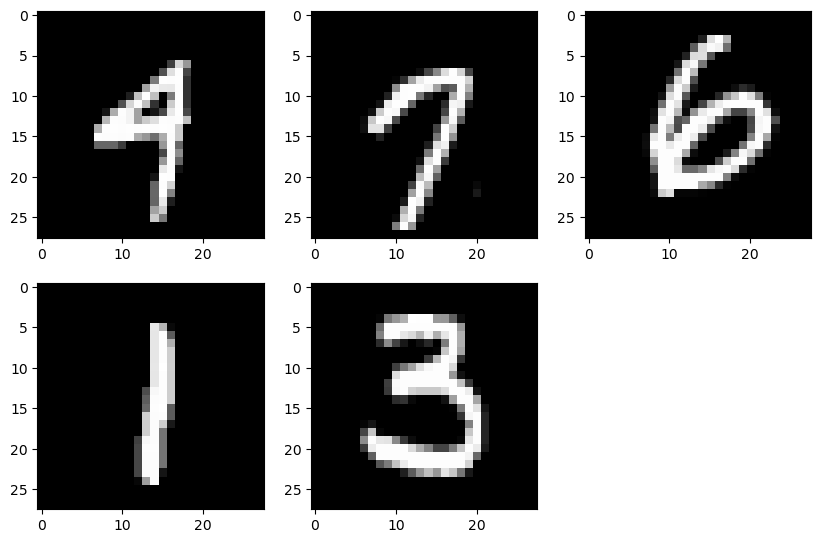

In [10]:
X=df.drop(columns=['label'])
y=df['label']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    img=X.iloc[i].values.reshape(28,28)
    plt.imshow(img,cmap='gray')
plt.show()


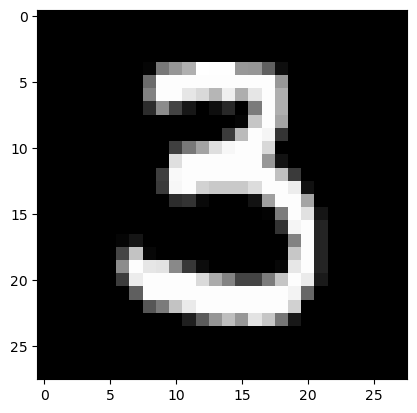

In [11]:
# plt.figure(figsize=(10,10))
curr=X.iloc[4].values.reshape(28,28)
plt.imshow(curr,cmap='gray')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3150, 784), (1050, 784), (3150,), (1050,))

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [17]:
y_pred=knn.predict(X_test)

In [18]:
y_pred

array([8, 6, 7, ..., 2, 1, 0])

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

<Axes: >

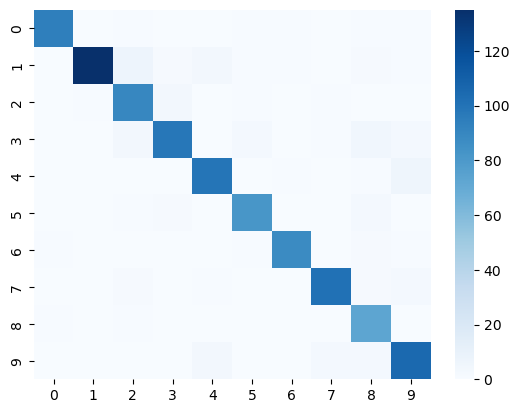

In [20]:
sns.heatmap(confusion_matrix(y_pred,y_test),cmap='Blues')

In [21]:
confusion_matrix(y_pred,y_test)

array([[ 94,   0,   1,   0,   0,   1,   1,   0,   1,   1],
       [  0, 135,   7,   2,   4,   1,   1,   0,   2,   1],
       [  0,   1,  90,   4,   0,   1,   0,   1,   0,   0],
       [  0,   0,   4,  98,   0,   3,   0,   1,   5,   3],
       [  0,   0,   0,   0,  99,   0,   1,   0,   1,   6],
       [  0,   0,   1,   2,   0,  82,   0,   0,   3,   0],
       [  1,   0,   0,   0,   0,   1,  88,   0,   2,   1],
       [  0,   0,   2,   0,   1,   0,   0, 101,   2,   3],
       [  1,   0,   1,   0,   0,   0,   0,   0,  73,   0],
       [  0,   0,   0,   0,   4,   0,   0,   3,   3, 105]])

In [2]:
# plt.colormaps()

In [23]:
accuracy_score(y_pred,y_test)

0.919047619047619

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        99
           1       0.99      0.88      0.93       153
           2       0.85      0.93      0.89        97
           3       0.92      0.86      0.89       114
           4       0.92      0.93      0.92       107
           5       0.92      0.93      0.93        88
           6       0.97      0.95      0.96        93
           7       0.95      0.93      0.94       109
           8       0.79      0.97      0.87        75
           9       0.88      0.91      0.89       115

    accuracy                           0.92      1050
   macro avg       0.92      0.92      0.92      1050
weighted avg       0.92      0.92      0.92      1050



In [25]:
knn1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [26]:
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_p=knn1.predict(X_test)

In [28]:
accuracy_score(y_p,y_test)

0.9152380952380952

In [29]:
print(classification_report(y_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       101
           1       0.99      0.86      0.92       157
           2       0.82      0.94      0.87        93
           3       0.92      0.84      0.88       116
           4       0.91      0.94      0.92       104
           5       0.90      0.96      0.93        83
           6       0.95      0.97      0.96        89
           7       0.93      0.92      0.93       108
           8       0.78      0.97      0.87        74
           9       0.93      0.89      0.91       125

    accuracy                           0.92      1050
   macro avg       0.91      0.92      0.92      1050
weighted avg       0.92      0.92      0.92      1050



[[ 95   0   1   0   0   1   4   0   0   0]
 [  0 135   7   3   4   1   0   2   4   1]
 [  0   1  87   2   0   0   0   1   2   0]
 [  0   0   4  98   0   5   0   1   5   3]
 [  0   0   0   0  98   1   1   0   1   3]
 [  0   0   1   1   0  80   0   0   1   0]
 [  1   0   0   0   1   0  86   0   1   0]
 [  0   0   6   0   0   0   0  99   1   2]
 [  0   0   0   1   0   1   0   0  72   0]
 [  0   0   0   1   5   0   0   3   5 111]]


<Axes: >

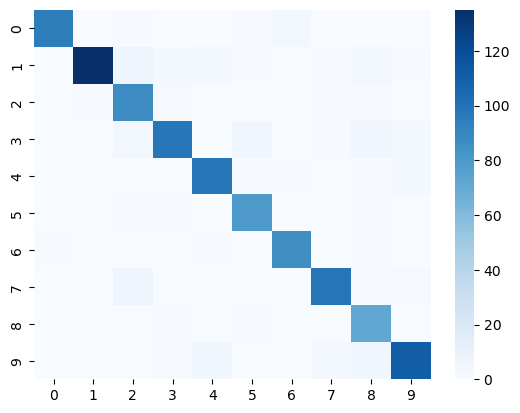

In [30]:
print(confusion_matrix(y_p,y_test))
sns.heatmap(confusion_matrix(y_p,y_test),cmap='Blues')

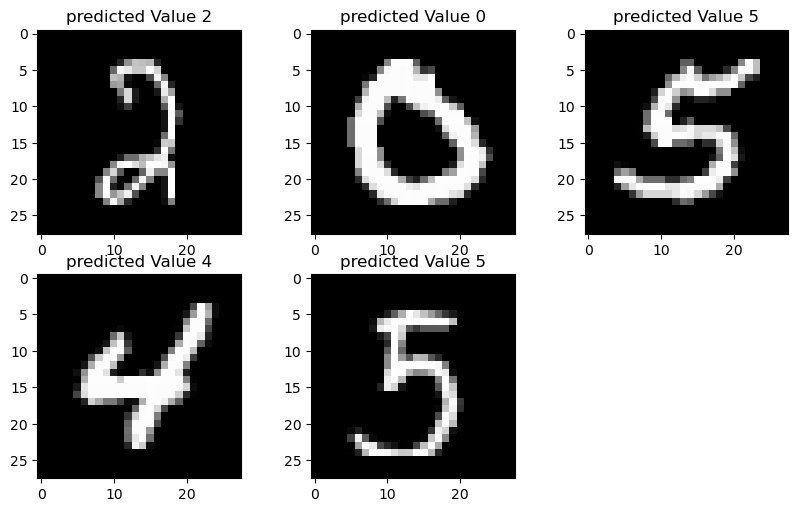

In [31]:
import random
plt.figure(figsize=(10,9))
for i in range(5):
    j=random.randint(0,99)
    plt.subplot(3,3,i+1)
    plt.title(f"predicted Value {y_pred[j]}")
    img2=X_test.iloc[j].values.reshape(28,28)
    # print("predicted Value",y_pred[i])
    plt.imshow(img2,cmap='gray')
plt.show()

In [32]:
import random

In [33]:
ddd=pd.read_csv('/home/user/MLLAB/tvmarketing.csv')

In [34]:
ddd

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
yped=knn.predict(df2)

In [78]:
yped

array([2, 0, 9, ..., 3, 9, 2])

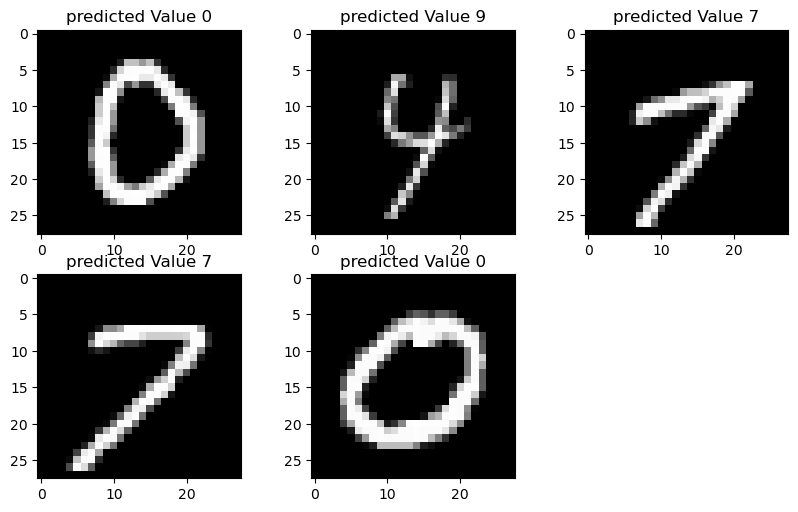

In [80]:
import random
plt.figure(figsize=(10,9))
for i in range(5):
    j=random.randint(0,99)
    plt.subplot(3,3,i+1)
    plt.title(f"predicted Value {yped[j]}")
    img2=df2.iloc[j].values.reshape(28,28)
    # print("predicted Value",y_pred[i])
    plt.imshow(img2,cmap='gray')
plt.show()